In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
df = pd.read_csv('C:\\Users\\acer\\Desktop\\all\\Flutter\\anime_rec\\backend\\dataset\\anime.csv')
df = df.reset_index()
df.head()

,index,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url
0,0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...
1,1,100,Neon Genesis Evangelion,Shinseiki Evangelion,4.248,54463,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...",TV,26,True,Unknown,1995,1996,Fall 1995,"GAINAX, Tatsunoko Production","In the future, a devastating event known as Se...",https://www.anime-planet.com/anime/neon-genesi...
2,2,1000,Full Metal Panic! The Second Raid,Unknown,4.35,23948,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",TV,13,True,Unknown,2005,2005,Summer 2005,Kyoto Animation,Half a year has passed since Sousuke Sagara to...,https://www.anime-planet.com/anime/full-metal-...
3,3,10000,22/7: Shampoo no Nioi ga Shita,Unknown,2.8,131,"Idols, School Life, CG Animation",Unknown,Music,1,True,5,2018,2018,Unknown,Unknown,The idol group 22/7 perform the song Shampoo n...,https://www.anime-planet.com/anime/22-7-shampo...
4,4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,Unknown,1.271,21,Family Friendly,Unknown,Web,1,True,2,2017,2017,Unknown,Toei Animation,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/oshiri-tant...


In [31]:
df.columns

Index(['index', 'Anime-PlanetID', 'Name', 'Alternative Name', 'Rating Score',
       'Number Votes', 'Tags', 'Content Warning', 'Type', 'Episodes',
       'Finished', 'Duration', 'StartYear', 'EndYear', 'Season', 'Studios',
       'Synopsis', 'Url'],
      dtype='object')

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('C:\\Users\\acer\\Desktop\\all\\Flutter\\anime_rec\\backend\\dataset\\anime.csv')  # Replace with your actual file name

# Drop rows with missing values
data = data.dropna()

# Convert 'Rating Score' to float and drop rows with invalid scores
data['Rating Score'] = pd.to_numeric(data['Rating Score'], errors='coerce')
data = data.dropna(subset=['Rating Score'])

# Sort the anime by 'Rating Score' in descending order and select the top 10
top_anime = data.sort_values(by='Rating Score', ascending=False).head(10)

# Debugging: Print the top 10 data to ensure it's populated
print(top_anime)




       Anime-PlanetID                                               Name  \
6257            15791                            Fruits Basket the Final   
8548             2360                   Fullmetal Alchemist: Brotherhood   
4013            13739                   Attack on Titan The Final Season   
4361            14059  Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...   
2096            11965                Attack on Titan 3rd Season: Part II   
4546            14229                                     Jujutsu Kaisen   
14231            7777  Haikyuu!! Karasuno High School vs Shiratorizaw...   
13207            6805                                     A Silent Voice   
10587            4336                             Hunter x Hunter (2011)   
14089            7639                                         your name.   

                                        Alternative Name  Rating Score  \
6257                                             Unknown         4.716   
8548      Hagan

### Plotting top 10 anime of all time (based on Rating-Score)

C:\Users\acer\AppData\Local\Temp\ipykernel_11616\543764633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_anime, x='Rating Score', y='Name', palette='plasma')  # Use DataFrame columns directly


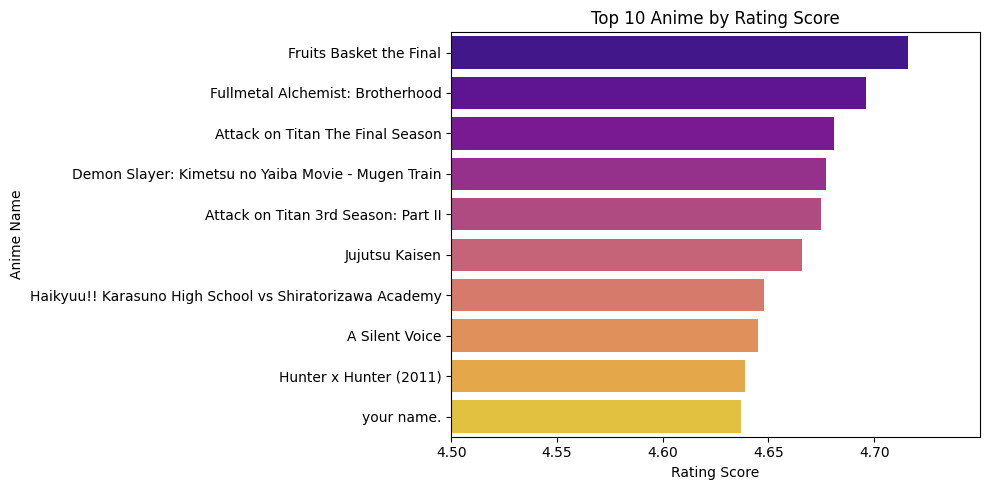

In [33]:
# Plotting with Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=top_anime, x='Rating Score', y='Name', palette='plasma')  # Use DataFrame columns directly
plt.xlabel('Rating Score')
plt.ylabel('Anime Name')
plt.title('Top 10 Anime by Rating Score')

# Set x-axis ticks and labels from 4.5 to 4.7 with a gap of 0.05
plt.xticks(ticks=[x * 0.05 + 4.5 for x in range(5)], labels=[f'{x * 0.05 + 4.5:.2f}' for x in range(5)])

# Set x-axis limits from 4.5 to 4.7
plt.xlim(4.5, 4.75)

plt.tight_layout()
plt.show()

In [34]:
features = ['Rating Score','Number Votes','Studios','Synopsis', 'Tags', 'Episodes']

In [35]:
def combined_features(row):
    return str(row["Rating Score"])+" "+ str(row["Number Votes"])+" "+ str(row["Studios"])+" "+ str(row["Synopsis"])+" "+ str(row["Tags"])+" "+ str(row["Episodes"])+" "

def get_title_from_index(index):
    return df[df["index"] == index]["Name"].values[0]
def get_index_from_title(title):
    return df[df["Name"] == title]["index"].values[0]

In [36]:
df["combined_feature"]=df.apply(combined_features,axis=1)
df["combined_feature"].head()

0    4.037 10889 Production I.G, Trans Arts Meet Ry...
1    4.248 54463 GAINAX, Tatsunoko Production In th...
2    4.35 23948 Kyoto Animation Half a year has pas...
3    2.8 131 Unknown The idol group 22/7 perform th...
4    1.271 21 Toei Animation No synopsis yet - chec...
Name: combined_feature, dtype: object

In [37]:
cv = CountVectorizer()
count_matrix=cv.fit_transform(df["combined_feature"])

In [38]:
anime_liked = "naruto"


In [39]:
cosine_sim = cosine_similarity(count_matrix)
from difflib import get_close_matches


def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
    similar_anime = list(enumerate(liked_movie_index))
    similar_anime.sort(key=lambda row: row[1], reverse=True)
    for i in range(30):
        print(get_title_from_index(similar_anime[i][0]))
except Exception as e:
    print(f"Error: {e}")


naruto
naruto shippuden movie 3: the will of fire
lupin iii special 1: bye bye, lady liberty
naruto special 2: battle at hidden falls. i am the hero!
naruto spin-off: rock lee & his ninja pals
berserk
naruto shippuden
flame of recca
naruto shippuden movie 5: blood prison
naruto shippuden movie 1
shounen onmyouji
black lagoon
nura: rise of the youkai clan
radiant
the dagger of kamui
ichigo 100% - jump festa 2004
dorohedoro
the wonderful adventures of nils holgersson
disgaea
kurokami the animation
one piece
the boy who saw the wind
zoids: genesis
nabari no ou
jibaku-kun: twelve world story
gakkyuu ou yamazaki
taishou mebiusline: chicchai-san
tistou midori no oyayubi
naruto shippuden movie 4: the lost tower
07-ghost


#### Recommendation using Cosine Similarity

In [40]:
# from difflib import get_close_matches
# from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error
# from sklearn.model_selection import train_test_split
# import numpy as np
# import pandas as pd

# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
#     if matches:
#         title = matches[0]  
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")

# df['Rating Score'] = pd.to_numeric(df['Rating Score'], errors='coerce')
# df['Number Votes'] = pd.to_numeric(df['Number Votes'], errors='coerce')

# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# try:
    
#     y_true = []
#     y_pred = []
#     mae_scores = []
    
#     for idx, row in test_df.iterrows():
#         true_rating = row['Rating Score']
#         anime_name = row['Name']
        
#         liked_movie_index = cosine_sim[get_index_from_title(anime_name)]
#         similar_anime = list(enumerate(liked_movie_index))
#         similar_anime.sort(key=lambda x: x[1], reverse=True)
        
#         recommended_indices = [x[0] for x in similar_anime[1:31]]  
        
#         pred_ratings = df.iloc[recommended_indices]['Rating Score'].mean()
        
#         y_true.append(1 if true_rating >= 4.0 else 0)
#         y_pred.append(1 if pred_ratings >= 4.0 else 0)
        
#         mae_scores.append(abs(true_rating - pred_ratings))
        
    
#     precision = precision_score(y_true, y_pred)
#     recall = recall_score(y_true, y_pred)
#     f1 = f1_score(y_true, y_pred)
#     mae = np.mean(mae_scores)
    
#     print(f"\nRecommendations for {anime_liked} (Cosine Similarity):")
#     liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
#     similar_anime = list(enumerate(liked_movie_index))
#     similar_anime.sort(key=lambda row: row[1], reverse=True)
#     for i in range(30):
#         print(get_title_from_index(similar_anime[i][0]))
        
#     print("\n")
#     print()
    
#     print(f"Precision: {precision:.3f}")
#     print(f"Recall: {recall:.3f}")
#     print(f"F1 Score: {f1:.3f}")
#     print(f"Mean Absolute Error: {mae:.3f}")
    
        
# except Exception as e:
#     print(f"Error: {e}")


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np


df['Tags'] = df['Tags'].fillna('')
df['Studios'] = df['Studios'].fillna('')
df['Type'] = df['Type'].fillna('Unknown')

print(df['Number Votes'].unique())

df['Number Votes'] = pd.to_numeric(df['Number Votes'], errors='coerce').fillna(0)

scaler = StandardScaler()
scaled_votes = scaler.fit_transform(df[['Number Votes']])


tag_vectorizer = TfidfVectorizer(stop_words='english', max_features=600)
tag_matrix = tag_vectorizer.fit_transform(df['Tags']).toarray()

encoder = OneHotEncoder()
studios_encoded = encoder.fit_transform(df[['Studios']]).toarray()
type_encoded = encoder.fit_transform(df[['Type']]).toarray()

features_combined = np.hstack([scaled_votes, tag_matrix, studios_encoded, type_encoded])
np.save('features_combined.npy', features_combined)


[10889. 54463. 23948. ... 21746.  5925.  8396.]


#### Recommendation using k-Means

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error

# Perform KMeans
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(features_combined)

df['KMeans_Cluster'] = clusters

def recommend_anime_kmeans(title, top_n=10):
    anime_index = get_index_from_title(title)
    anime_cluster = df.loc[anime_index, 'KMeans_Cluster']
    
    similar_anime = df[df['KMeans_Cluster'] == anime_cluster]
    
    recommended_anime = similar_anime[similar_anime['Name'] != title].head(top_n)['Name'].values
    return recommended_anime

recommended_anime_kmeans = recommend_anime_kmeans(anime_liked)
print(f"Anime similar to '{anime_liked}' based on KMeans clustering:")
for anime in recommended_anime_kmeans:
    print(anime)

true_labels = (df['KMeans_Cluster'] == df.loc[get_index_from_title(anime_liked), 'KMeans_Cluster']).astype(int)
pred_labels = np.zeros(len(df))
recommended_indices = [get_index_from_title(anime) for anime in recommended_anime_kmeans]
pred_labels[recommended_indices] = 1

precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
df['Rating Score'] = pd.to_numeric(df['Rating Score'].replace('Unknown', np.nan), errors='coerce')
df['Rating Score'] = df['Rating Score'].fillna(df['Rating Score'].mean())

true_ratings = df['Rating Score'].values
pred_ratings = np.zeros(len(df))
pred_ratings[recommended_indices] = df.loc[get_index_from_title(anime_liked), 'Rating Score']
mae = mean_absolute_error(true_ratings, pred_ratings)

print("\nMetrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")


Anime similar to 'Naruto' based on KMeans clustering:
ouran high school host club
death note
code geass: lelouch of the rebellion
howl's moving castle
naruto shippuden
code geass: lelouch of the rebellion r2
soul eater
toradora!
naruto
fullmetal alchemist: brotherhood

Metrics:
Precision: 1.000
Recall: 0.385
F1 Score: 0.556
Mean Absolute Error: 2.861


#### Recommendation using KNN

In [51]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error

knn = NearestNeighbors(n_neighbors=11, metric='cosine')  
knn.fit(features_combined)

def get_index_from_title(title):
    try:
        return df[df['Name'].str.lower() == title.lower()].index[0]
    except IndexError:
        return -1  # Return -1 if the title is not found

# Function to recommend based on KNN
def recommend_anime_knn(title, top_n=10):
    anime_index = get_index_from_title(title)
    
    distances, indices = knn.kneighbors(features_combined[anime_index].reshape(1, -1))
    
    recommended_anime = df.iloc[indices[0][1:top_n+1]]['Name'].values
    return recommended_anime

recommended_anime_knn = recommend_anime_knn(anime_liked)
print(f"Anime similar to '{anime_liked}' based on KNN:")
for anime in recommended_anime_knn:
    print(anime)

pred_labels = np.zeros(len(df))
recommended_indices = [get_index_from_title(anime) for anime in recommended_anime_knn]
pred_labels[recommended_indices] = 1

distances, _ = knn.kneighbors(features_combined)
similarity_threshold = np.percentile(distances.flatten(), 90)  # Consider top 10% most similar as true positives
_, indices = knn.kneighbors(features_combined[get_index_from_title(anime_liked)].reshape(1, -1))
true_labels = np.zeros(len(df))
true_labels[indices[0][1:]] = 1 
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

df['Rating Score'] = pd.to_numeric(df['Rating Score'].replace('Unknown', np.nan), errors='coerce')
df['Rating Score'] = df['Rating Score'].fillna(df['Rating Score'].mean())

true_ratings = df['Rating Score'].values
pred_ratings = np.zeros(len(df))
pred_ratings[recommended_indices] = df.loc[get_index_from_title(anime_liked), 'Rating Score']
mae = mean_absolute_error(true_ratings, pred_ratings)

print("\nMetrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")


Anime similar to 'Naruto' based on KNN:
naruto shippuden
bleach
death note
tokyo ghoul
attack on titan
sword art online
fullmetal alchemist: brotherhood
fullmetal alchemist
code geass: lelouch of the rebellion
one-punch man

Metrics:
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Mean Absolute Error: 2.861


#### Recommendation using Eculidean Distance

In [52]:
from scipy.spatial.distance import cdist
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error
import numpy as np

def recommend_anime_euclidean(title, top_n=10):
    anime_index = get_index_from_title(title)
    anime_features = features_combined[anime_index]
    
    # Euclidean distances
    distances = cdist([anime_features], features_combined, metric='euclidean').flatten()
    
    
    closest_indices = np.argsort(distances)[1:top_n + 1]
    recommended_anime = [get_title_from_index(idx) for idx in closest_indices]
    
    
    y_pred = distances[closest_indices]
    y_true = df.iloc[closest_indices]['Rating Score'].values
    
    
    median_rating = np.median(df['Rating Score'])
    y_true_binary = (y_true > median_rating).astype(int)
    y_pred_binary = (y_pred < np.median(y_pred)).astype(int) 
    
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    mae = mean_absolute_error(y_true, y_pred)
    
    print("\nModel Evaluation Metrics:")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}") 
    print(f"F1 Score: {f1:.3f}")
    print(f"Mean Absolute Error: {mae:.3f}")
    
    return recommended_anime


anime_liked = "Naruto"
recommended_anime_euclidean = recommend_anime_euclidean(anime_liked)
print(f"\nAnime similar to '{anime_liked}' based on Euclidean distance:")
for anime in recommended_anime_euclidean:
    print(anime)



Model Evaluation Metrics:
Precision: 1.000
Recall: 0.500
F1 Score: 0.667
Mean Absolute Error: 1.031

Anime similar to 'Naruto' based on Euclidean distance:
attack on titan
sword art online
fullmetal alchemist: brotherhood
naruto shippuden
spirited away
bleach
fullmetal alchemist
code geass: lelouch of the rebellion
one-punch man
my hero academia


##### Saving the model (KNN)

In [53]:
import os
import pickle

# Define the directory and file path
directory = "..\\model"
os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist
file_path = os.path.join(directory, "model.pkl")

# Save the trained KNN model to the specified path
with open(file_path, "wb") as model_file:
    pickle.dump(knn, model_file)

print(f"Model saved as '{file_path}'")


Model saved as '..\model\model.pkl'


In [54]:
import pandas as pd

# Sample Data (replace this with your actual dataset)
# df = pd.DataFrame({
#     'Name': ['Naruto', 'One Piece', 'Attack on Titan', 'Demon Slayer', 'My Hero Academia'],
#     'Tags': ['Drama, Action, Adventure', 'Action, Adventure', 'Action, Drama', 'Action, Supernatural', 'Action, Drama'],
#     'Rating Score': [8.5, 9.0, 8.8, 8.7, 8.9]
# })

# Preprocess the Tags column: Ensure tags are sorted alphabetically
data['Tags'] = data['Tags'].fillna('')
data['Tags'] = data['Tags'].apply(lambda x: ', '.join(sorted(x.split(', '))))  # Sort tags alphabetically

# Function to recommend anime based on genre/tag
def recommend_by_genre(genre, top_n=15):
    # Find anime with the selected tag
    selected_genre_index = [i for i, tags in enumerate(data['Tags']) if genre in tags]

    if not selected_genre_index:
        return f"No anime found with the tag: {genre}"

    # Filter the recommended anime based on the selected genre
    recommended_anime = data.iloc[selected_genre_index][['Name', 'Tags', 'Rating Score']]

    # Sort the recommendations by Rating Score in descending order
    recommended_anime = recommended_anime.sort_values(by='Rating Score', ascending=False)

    # Return the top_n recommendations
    return recommended_anime.head(top_n)

# User input for genre/tag
selected_tag = "Action"

# Get recommendations based on the selected tag
recommended_anime = recommend_by_genre(selected_tag)

print("\nRecommended anime sorted by rating (Top 15):")
print(recommended_anime)



Recommended anime sorted by rating (Top 15):
                                                    Name  \
8548                    Fullmetal Alchemist: Brotherhood   
4013                    Attack on Titan The Final Season   
4361   Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...   
2096                 Attack on Titan 3rd Season: Part II   
4546                                      Jujutsu Kaisen   
10587                             Hunter x Hunter (2011)   
343                       Demon Slayer: Kimetsu no Yaiba   
11513        Gintama Kanketsu-hen: Yorozuya yo Eien Nare   
13283                                     Gintama (2015)   
16449                                  Mob Psycho 100 II   
3312    That Time I Got Reincarnated as a Slime Season 2   
9970                                            Gintama'   
11553                                Gintama': Enchousen   
14579                                           Gintama.   
50                 Gintama.: Shirogane no Tamashii-hen

## Top 10 Anime based on selected Studio


Top anime by 'Pierrot' (based on Rating Score and Number Votes):
1. great teacher onizuka - Rating: 4.521, Votes: 30416.0
2. yona of the dawn: zeno arc - Rating: 4.519, Votes: 4603.0
3. kingdom 3 - Rating: 4.452, Votes: 419.0
4. kingdom 2 - Rating: 4.423, Votes: 3006.0
5. yona of the dawn - Rating: 4.402, Votes: 27532.0
6. baby steps 2 - Rating: 4.357, Votes: 3325.0
7. yu yu hakusho - Rating: 4.316, Votes: 28641.0
8. naruto shippuden - Rating: 4.311, Votes: 96260.0
9. tokyo ghoul - Rating: 4.298, Votes: 79297.0
10. yona of the dawn ova - Rating: 4.277, Votes: 4869.0
11. the last: naruto the movie - Rating: 4.262, Votes: 16392.0
12. osomatsu-san the movie - Rating: 4.251, Votes: 254.0
13. baby steps - Rating: 4.24, Votes: 4581.0
14. hikaru no go: journey to the north star cup - Rating: 4.221, Votes: 1326.0
15. naruto shippuden movie 6: road to ninja - Rating: 4.19, Votes: 13612.0


C:\Users\acer\AppData\Local\Temp\ipykernel_11616\214724107.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


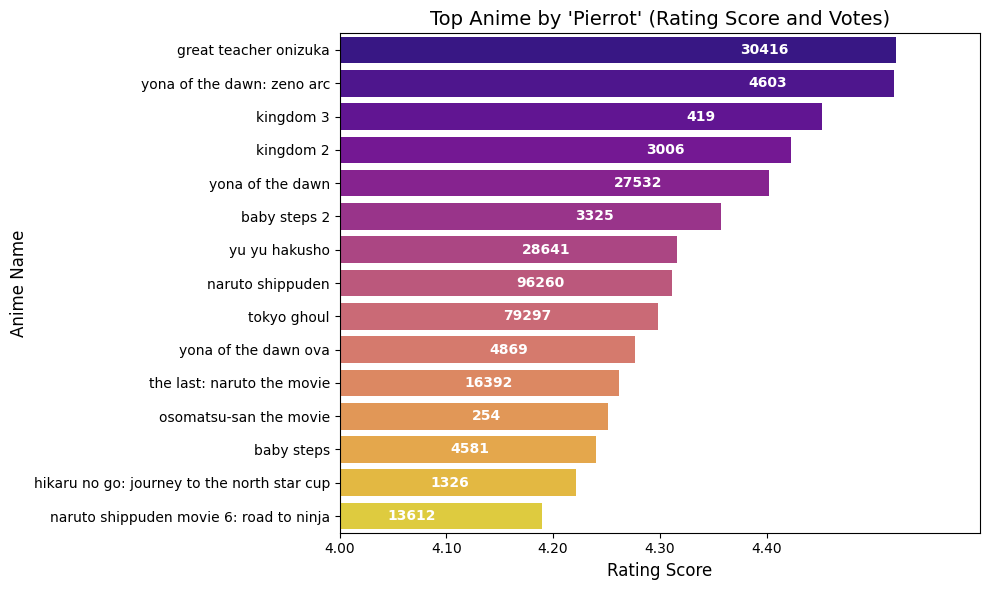

In [55]:
# Ensure that the columns are properly typed
df['Rating Score'] = pd.to_numeric(df['Rating Score'], errors='coerce')
df['Number Votes'] = pd.to_numeric(df['Number Votes'], errors='coerce')

# Specify the studio to filter anime
selected_studio = "Pierrot"  # Replace this with the desired studio name

# Filter anime by the selected studio
anime_by_studio = df[df['Studios'].str.contains(selected_studio, na=False, case=False)]

# Limit the dataset to a maximum of 15 entries (sorted by Rating Score and Number Votes)
top_anime_by_studio = anime_by_studio.sort_values(
    by=['Rating Score', 'Number Votes'], ascending=[False, False]
).head(15)

# Check if there are anime by the studio
if top_anime_by_studio.empty:
    print(f"No anime found for the studio '{selected_studio}'.")
else:
    # Print the filtered anime
    print(f"\nTop anime by '{selected_studio}' (based on Rating Score and Number Votes):")
    for i, (name, rating, votes) in enumerate(
        zip(top_anime_by_studio['Name'], top_anime_by_studio['Rating Score'], top_anime_by_studio['Number Votes']), 1
    ):
        print(f"{i}. {name} - Rating: {rating}, Votes: {votes}")

    # Visualize the top anime using Seaborn
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))

    # Create the barplot
    ax = sns.barplot(
        data=top_anime_by_studio,
        x='Rating Score',
        y='Name',
        palette='plasma'
    )

    # Annotate each bar with the number of votes inside the bar
    for bar, votes in zip(ax.patches, top_anime_by_studio['Number Votes']):
        bar_width = bar.get_width()  # Get the width of the bar (Rating Score)
        bar_height = bar.get_height()  # Get the height of the bar (constant for horizontal bars)
        ax.text(
            bar_width - 0.1,          # X-coordinate: Slightly left inside the bar
            bar.get_y() + bar_height / 2,  # Y-coordinate: Center of the bar
            f"{int(votes)}",          # Text: Number of votes
            va='center', ha='right', color='white', fontsize=10, weight='bold'
        )

    # Add title and axis labels
    plt.xlabel('Rating Score', fontsize=12)
    plt.ylabel('Anime Name', fontsize=12)
    plt.title(f"Top Anime by '{selected_studio}' (Rating Score and Votes)", fontsize=14)

    # Set x-axis ticks and labels from 4.0 to 5.0
    plt.xticks(ticks=[x * 0.1 + 4.0 for x in range(5)], labels=[f'{x * 0.1 + 4.0:.2f}' for x in range(5)], fontsize=10)

    # Set x-axis limits from 4.0 to 5.0
    plt.xlim(4.0, 4.6)

    plt.tight_layout()
    plt.show()


## Top 10 Anime based on selected Genre/Tags


Recommended anime sorted by rating (Top 15):
                                                    Name  \
8548                    Fullmetal Alchemist: Brotherhood   
4013                    Attack on Titan The Final Season   
4361   Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...   
2096                 Attack on Titan 3rd Season: Part II   
4546                                      Jujutsu Kaisen   
10587                             Hunter x Hunter (2011)   
343                       Demon Slayer: Kimetsu no Yaiba   
11513        Gintama Kanketsu-hen: Yorozuya yo Eien Nare   
13283                                     Gintama (2015)   
16449                                  Mob Psycho 100 II   
3312    That Time I Got Reincarnated as a Slime Season 2   
9970                                            Gintama'   
11553                                Gintama': Enchousen   
14579                                           Gintama.   
50                 Gintama.: Shirogane no Tamashii-hen

C:\Users\acer\AppData\Local\Temp\ipykernel_11616\1784743727.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


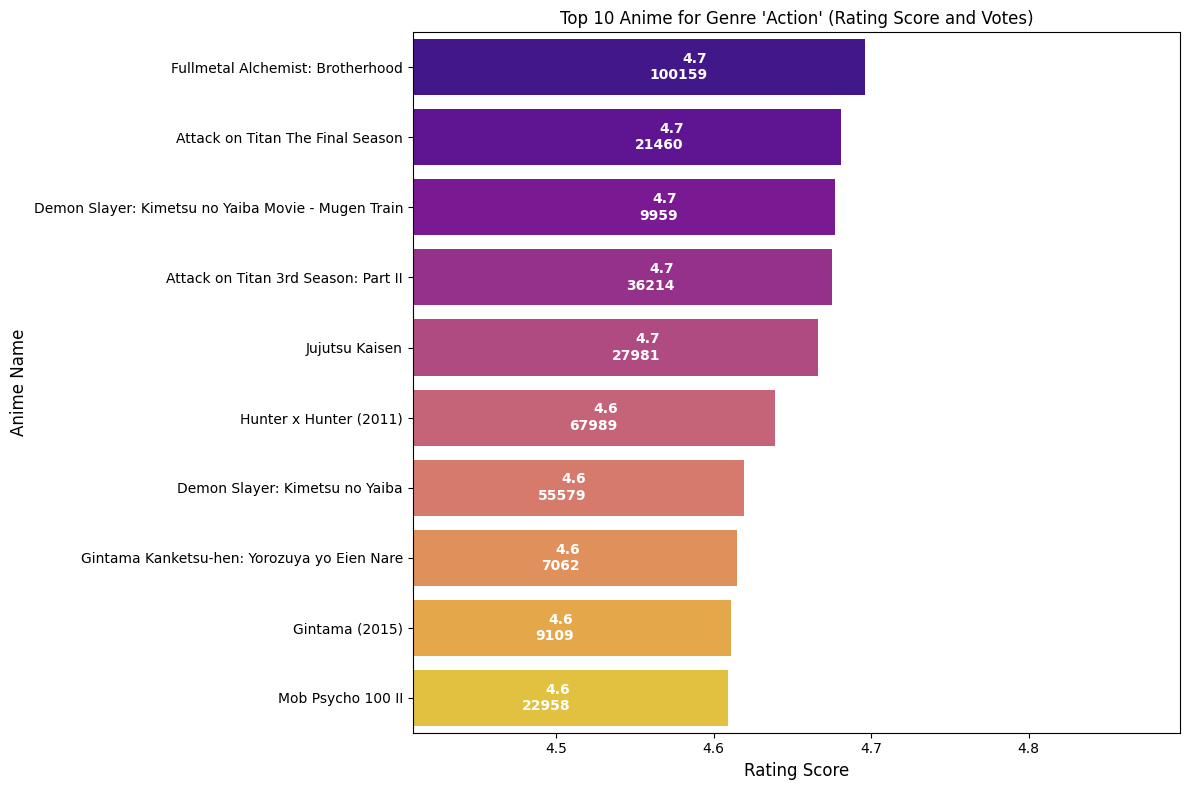

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called `data`
# Replace the following line with your actual dataset loading process
data = pd.read_csv('D:/College/sem 7/final year project/gith/AniSearch/anime.csv')  # Replace with your actual file name

# Preprocess the Tags column: Ensure tags are sorted alphabetically
data['Tags'] = data['Tags'].fillna('')  # Handle missing Tags
data['Tags'] = data['Tags'].apply(lambda x: ', '.join(sorted(x.split(', '))))  # Sort tags alphabetically

# Ensure the 'Rating Score' column is numeric
data['Rating Score'] = pd.to_numeric(data['Rating Score'], errors='coerce')

# Function to recommend anime based on genre/tag
def recommend_by_genre(genre, top_n=15):
    # Filter the dataset to include rows where the genre appears in the Tags
    selected_anime = data[data['Tags'].str.contains(genre, case=False, na=False)]

    if selected_anime.empty:
        return None, f"No anime found with the tag: {genre}"

    # Select relevant columns and sort by Rating Score (descending)
    recommended_anime = selected_anime[['Name', 'Tags', 'Rating Score', 'Number Votes']].copy()
    recommended_anime = recommended_anime.sort_values(by='Rating Score', ascending=False)

    # Return the top_n recommendations
    return recommended_anime.head(top_n), None

# User input for genre/tag
selected_tag = "Action"  # Modify this to the genre/tag you want

# Get recommendations based on the selected tag
recommended_anime, error_message = recommend_by_genre(selected_tag)

if recommended_anime is None:
    print(error_message)
else:
    print("\nRecommended anime sorted by rating (Top 15):")
    print(recommended_anime)

    # Visualize the top 10 anime for the selected tag
    top_n = 10  # Show top 10 anime in the plot
    recommended_anime_top_n = recommended_anime.head(top_n)

    if not recommended_anime_top_n.empty:
        plt.figure(figsize=(12, 8))

        # Create the barplot
        ax = sns.barplot(
            data=recommended_anime_top_n,
            x='Rating Score',
            y='Name',
            palette='plasma'
        )

        # Annotate each bar with the rating score and number of votes
        for bar, (rating, votes) in zip(ax.patches, zip(recommended_anime_top_n['Rating Score'], recommended_anime_top_n['Number Votes'])):
            bar_width = bar.get_width()  # Get the width of the bar (Rating Score)
            bar_height = bar.get_height()  # Get the height of the bar (constant for horizontal bars)
            ax.text(
                bar_width - 0.1,          # X-coordinate: Slightly left inside the bar
                bar.get_y() + bar_height / 2,  # Y-coordinate: Center of the bar
                f"{rating:.1f}\n{int(votes)}",  # Text: Rating Score and Number of Votes
                va='center', ha='right', color='white', fontsize=10, weight='bold'
            )

        # Add title and axis labels
        plt.xlabel('Rating Score', fontsize=12)
        plt.ylabel('Anime Name', fontsize=12)
        plt.title(f"Top {top_n} Anime for Genre '{selected_tag}' (Rating Score and Votes)", fontsize=12)

        # Set x-axis limits dynamically based on the data
        min_score = recommended_anime_top_n['Rating Score'].min() - 0.2
        max_score = recommended_anime_top_n['Rating Score'].max() + 0.2
        plt.xlim(min_score, max_score)

        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to plot for the genre '{selected_tag}'.")
